# Separacja punktów na płaszczyźnie

Dany jest zbiór punktów czerwonych i zbiór punktów niebieskich na płaszczyźnie. Należy znaleźć prostą rozdzielającą te dwa zbiory lub wykazać, że ona nie istnieje. Należy to zrobić rozwiązując odpowiedni problem liniowy. Rozwiązanie powinno działać dla dowolnych wartości wpisanych w listach C i N poniżej.

'Dane punkty'

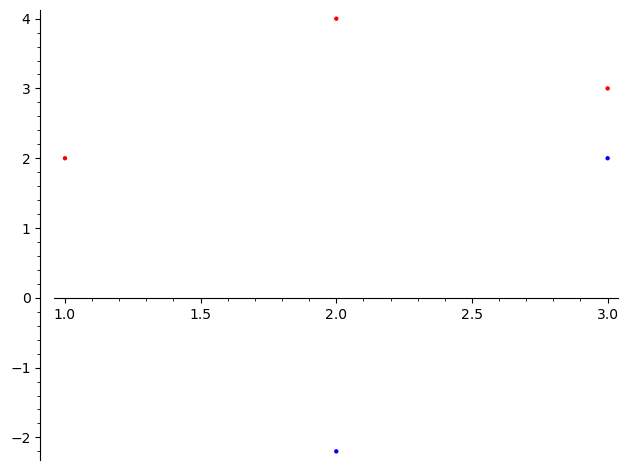

In [38]:
# Dane wejściowe

C = [ (1,2), (3,3), (2,4) ] # Zbiór punktów czerwonych
N = [ (2,-2.2), (3,2) ] # Zbiór punktów niebieskich

# Prezentacja danych wejściowych

show('Dane punkty')
show(list_plot(C, color="red") + list_plot(N, color="blue"))


In [39]:
show(C)
show(N)

[(1, 2), (3, 3), (2, 4)]

[(2, -2.20000000000000), (3, 2)]

In [40]:
# zmienne a, b, delta

P = InteractiveLPProblem(matrix(QQ, 0, 3), vector(QQ, 0), vector(QQ, [0, 0, 1]), x=['a', 'b', 'delta'])
show(P)                         

LP problem (use 'view(...)' or '%display typeset' for details)

In [41]:
# punkt P(1, 2):   
# a * 1 + b <= 2 - delta
# P[0] * a + b + delta <= P[1]
for Q in C:
    P = P.add_constraint([Q[0], 1, 1], Q[1])
    
for Q in N:
    P = P.add_constraint([Q[0], 1, -1], Q[1], '>=')
    
show(P)

LP problem (use 'view(...)' or '%display typeset' for details)

In [45]:
def separacja_punktow(C, N):
    P = InteractiveLPProblem(matrix(QQ, 0, 3), vector(QQ, 0), vector(QQ, [0, 0, 1]), x=['a', 'b', 'delta'])
    for Q in C:
        P = P.add_constraint([Q[0], 1, 1], Q[1])
    
    for Q in N:
        P = P.add_constraint([Q[0], 1, -1], Q[1], '>=')
    
    return P.optimal_solution()
    

In [49]:
a, b, delta = separacja_punktow(C, N)
a, b, delta

(21/5, -101/10, 1/2)

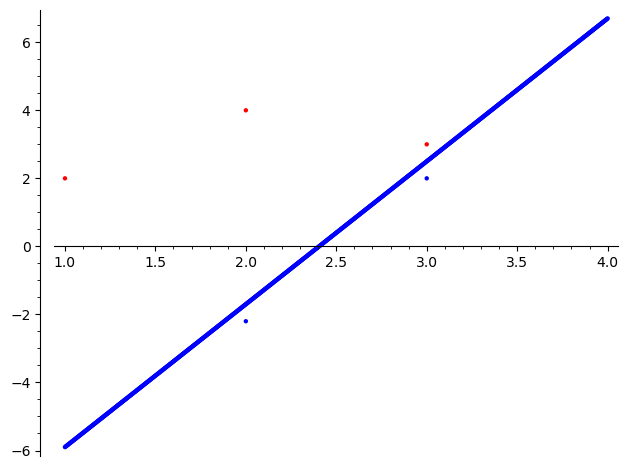

In [50]:
# Uwaga: dla danych C = [ (1,2), (3,3), (2,4) ] i N = [ (2,2.2), (3,2) ] rozwiązaniem może być prosta y = 0.5 x + 1.35, która wygląda tak:

import numpy

x = numpy.linspace(min(C, key=lambda x: x[0])[0], max(C, key=lambda x: x[1])[1], 1000)
y = a * x + b
list_plot(list(zip(x, y))) + list_plot(C, color="red") + list_plot(N, color="blue")
